In [15]:
import matplotlib.pyplot as plt
from src.finetune.pipeline import Pipeline
from src.segnet_bm.test import test_all_segnets
import os
import torch
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

# Evaluation Metrics

In [4]:
def mae_tester(name):
    pipeline = Pipeline()
    pipeline.load_model_checkpoint(f"./models/trained_models/mae_finetune_{name}/mae_finetune_{name}.pt")
    return pipeline.test()

Testing SegNets trained on proportion:  0.05


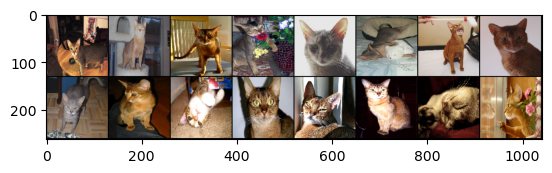

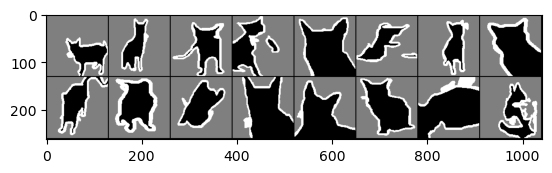

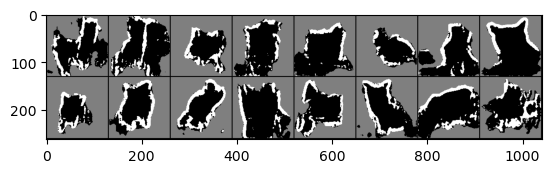


Analysisng test performance for : SegNet Standard Model 0.05
The Model has 15.27M parameters
Test Dataset Accuracy:
Pixel Accuracy: 0.7447, IoU Accuracy: 0.5613


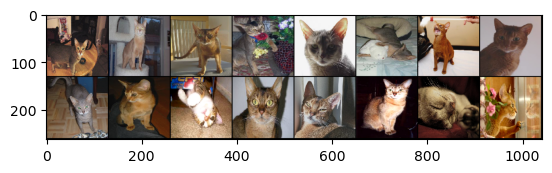

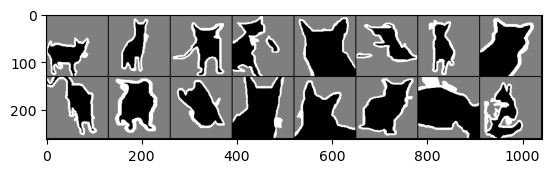

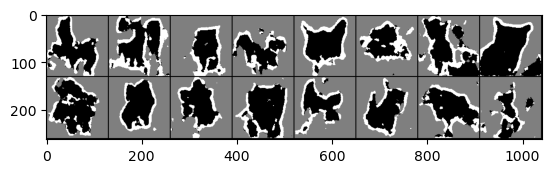


Analysisng test performance for : SegNet depthwise separable convolution Model 0.05
The Model has 1.75M parameters
Test Dataset Accuracy:
Pixel Accuracy: 0.7771, IoU Accuracy: 0.5556
Testing SegNets trained on proportion:  0.1


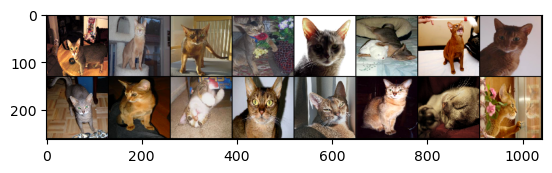

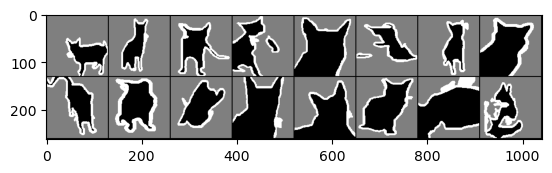

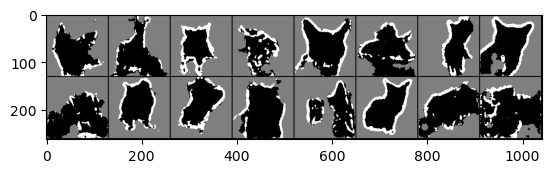


Analysisng test performance for : SegNet Standard Model 0.1
The Model has 15.27M parameters
Test Dataset Accuracy:
Pixel Accuracy: 0.7955, IoU Accuracy: 0.6044


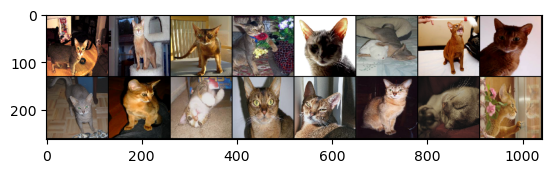

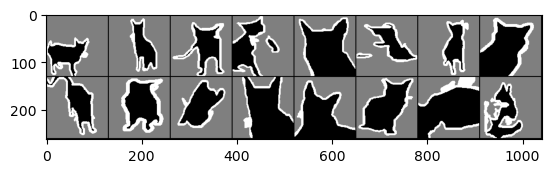

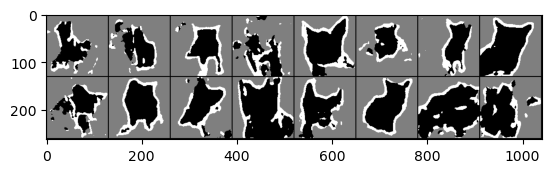


Analysisng test performance for : SegNet depthwise separable convolution Model 0.1
The Model has 1.75M parameters
Test Dataset Accuracy:
Pixel Accuracy: 0.8109, IoU Accuracy: 0.6377
Testing SegNets trained on proportion:  0.5


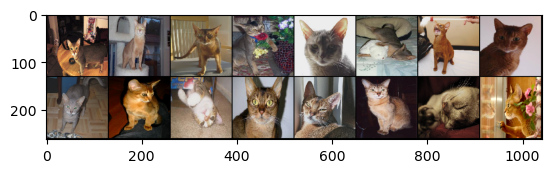

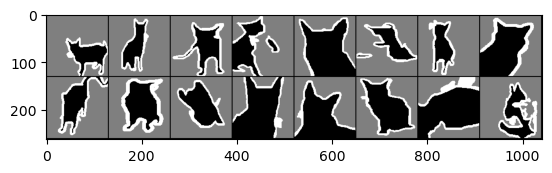

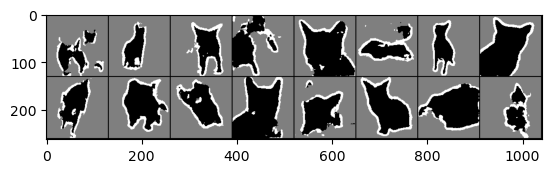


Analysisng test performance for : SegNet Standard Model 0.5
The Model has 15.27M parameters
Test Dataset Accuracy:
Pixel Accuracy: 0.8771, IoU Accuracy: 0.7094


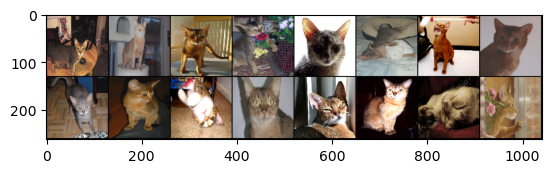

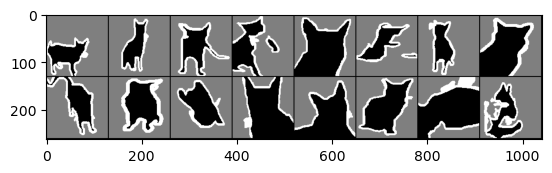

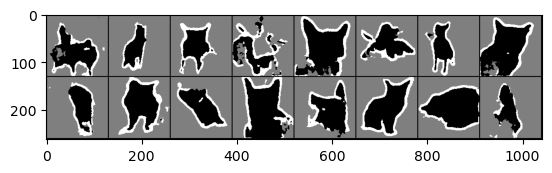


Analysisng test performance for : SegNet depthwise separable convolution Model 0.5
The Model has 1.75M parameters
Test Dataset Accuracy:
Pixel Accuracy: 0.8617, IoU Accuracy: 0.6775
Testing SegNets trained on proportion:  0.8


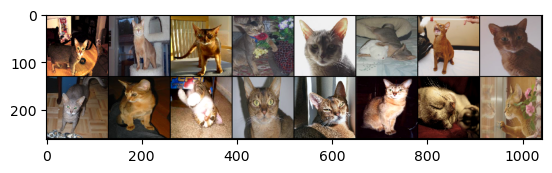

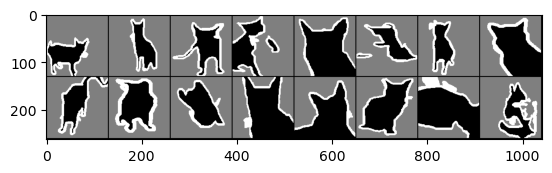

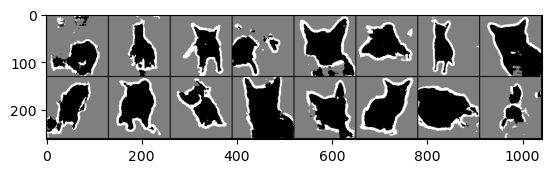


Analysisng test performance for : SegNet Standard Model 0.8
The Model has 15.27M parameters
Test Dataset Accuracy:
Pixel Accuracy: 0.8731, IoU Accuracy: 0.7040


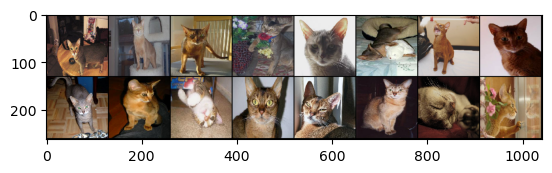

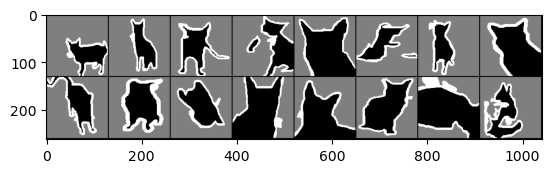

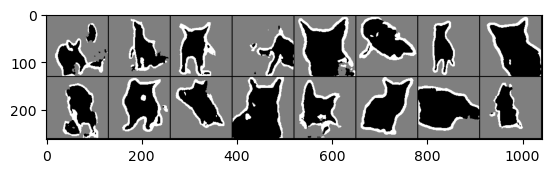


Analysisng test performance for : SegNet depthwise separable convolution Model 0.8
The Model has 1.75M parameters
Test Dataset Accuracy:
Pixel Accuracy: 0.8789, IoU Accuracy: 0.7095
Testing SegNets trained on proportion:  1


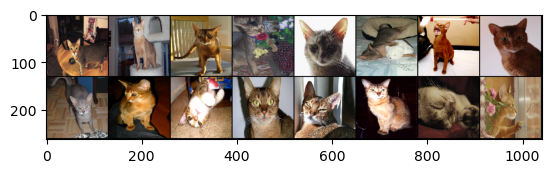

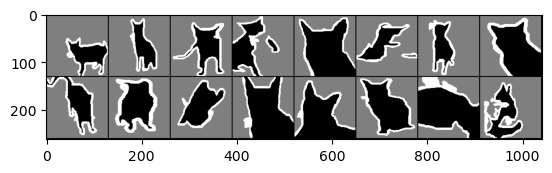

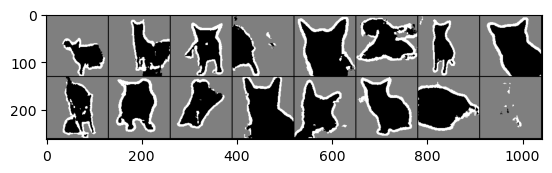


Analysisng test performance for : SegNet Standard Model 1
The Model has 15.27M parameters
Test Dataset Accuracy:
Pixel Accuracy: 0.8988, IoU Accuracy: 0.7499


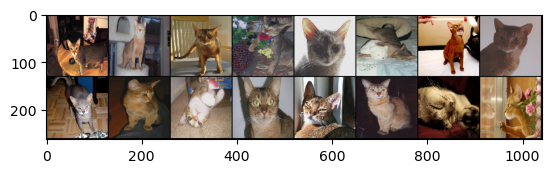

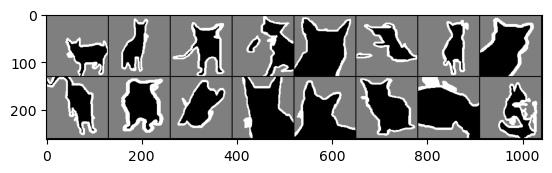

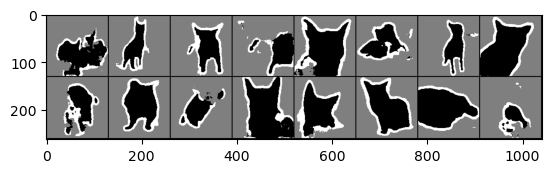


Analysisng test performance for : SegNet depthwise separable convolution Model 1
The Model has 1.75M parameters
Test Dataset Accuracy:
Pixel Accuracy: 0.8851, IoU Accuracy: 0.7216


In [5]:
segnet_results = test_all_segnets()

In [6]:
dataset_proportions = [0.05,0.1,0.5,0.8,1]

In [13]:
for p in dataset_proportions:
    print("="*100)
    print("On dataset proportion: ",p,"\n")
    mae_pixel_acc,mae_iou = mae_tester(p)
    Data = [
        ["MAE",mae_pixel_acc,mae_iou],
        ["SegNet",segnet_results[p][0][0],segnet_results[p][0][1]],
        ["SegNet DSC",segnet_results[p][1][0],segnet_results[p][1][1]]
    ]
    formatted_row = '{:>20} {:>20} {:>20}'
    print(formatted_row.format("Model", "Pixel Accuracy", "mIOU"))
    for Row in Data:
        print(formatted_row.format(*Row))

On dataset proportion:  0.05 

Performing MAE Finetuning
Using device:  cuda
LOADED ENCODER
Testing finetuned model
Test Dataset Accuracy:
Pixel Accuracy: 0.7270, IoU Accuracy: 0.6454
               Model       Pixel Accuracy                 mIOU
                 MAE   0.7269823551177979   0.6453834176063538
              SegNet   0.7446631789207458   0.5613367557525635
          SegNet DSC   0.7770872712135315     0.55562424659729
On dataset proportion:  0.1 

Performing MAE Finetuning
Using device:  cuda
LOADED ENCODER
Testing finetuned model
Test Dataset Accuracy:
Pixel Accuracy: 0.6782, IoU Accuracy: 0.8353
               Model       Pixel Accuracy                 mIOU
                 MAE   0.6782387495040894   0.8353418111801147
              SegNet     0.79546719789505   0.6044376492500305
          SegNet DSC   0.8109103441238403    0.637749969959259
On dataset proportion:  0.5 

Performing MAE Finetuning
Using device:  cuda
LOADED ENCODER
Testing finetuned model
Test Dataset A

# Training Performance

In [48]:
mae_legend = []
seg_legend = []
legend = []
for p in dataset_proportions:
    legend.append(f"MAE_{p}")
    mae_legend.append(f"MAE_{p}")
    legend.append(f"SegNet_{p}")
    legend.append(f"SegNet_DSC_{p}")
    seg_legend.append(f"SegNet_{p}")
    seg_legend.append(f"SegNet_DSC_{p}")

In [49]:
def plot_mae_trainig_metrics(mae):
    plt.figure(figsize=(12, 8))
    for i in range(len(dataset_proportions)):
        plt.plot(mae[i])

    plt.title('Training Metrics')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.grid(True)
    plt.legend(mae_legend)
    plt.show()

In [50]:
def plot_seg_training_metrics(seg,seg_dsc):
    plt.figure(figsize=(12, 8))
    for i in range(len(dataset_proportions)):
        plt.plot(seg[i])
        plt.plot(seg_dsc[i])

    plt.title('Training Metrics')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.grid(True)
    plt.legend(seg_legend)
    plt.show()

In [51]:
def plot_all_training_metrics(mae,seg,seg_dsc):
    plt.figure(figsize=(12, 8))
    for i in range(len(dataset_proportions)):
        plt.plot(mae[i])
        plt.plot(seg[i])
        plt.plot(seg_dsc[i])

    plt.title('Training Metrics')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.grid(True)
    plt.legend(legend)
    plt.show()

In [52]:
mae_ious = []
mae_train_loss = []
mae_val_loss = []
mae_train_dice = []
mae_val_dice = []
mae_pix_acc = []

seg_iou = []
seg_pix_acc = []
seg_train_loss = []
seg_val_loss = []

seg_dsc_iou = []
seg_dsc_pix_acc = []
seg_dsc_train_loss = []
seg_dsc_val_loss = []

for p in dataset_proportions:
    mae_his = torch.load(os.path.join("models","trained_models",f"mae_finetune_{p}",f"mae_finetune_{p}_history.pt"))
    mae_ious.append(mae_his["iou"])
    mae_train_loss.append(mae_his["training_loss"])
    mae_val_loss.append(mae_his["validation_loss"])
    mae_train_dice.append(mae_his["training_dice"])
    mae_val_dice.append(mae_his["validation_dice"])
    mae_pix_acc.append(mae_his["pixel_accuracy"])

    seg_iou.append(torch.load(os.path.join("models","segnet",f"segnet_standard_{p}",f"iou.pt")))
    seg_pix_acc.append(torch.load(os.path.join("models","segnet",f"segnet_standard_{p}",f"pixel_acc.pt")))
    seg_train_loss.append(torch.load(os.path.join("models","segnet",f"segnet_standard_{p}",f"train_loss.pt")))
    seg_val_loss.append(torch.load(os.path.join("models","segnet",f"segnet_standard_{p}",f"val_loss.pt")))

    seg_dsc_iou.append(torch.load(os.path.join("models","segnet",f"segnet_dsc_{p}",f"iou.pt")))
    seg_dsc_pix_acc.append(torch.load(os.path.join("models","segnet",f"segnet_dsc_{p}",f"pixel_acc.pt")))
    seg_dsc_train_loss.append(torch.load(os.path.join("models","segnet",f"segnet_dsc_{p}",f"train_loss.pt")))
    seg_dsc_val_loss.append(torch.load(os.path.join("models","segnet",f"segnet_dsc_{p}",f"val_loss.pt")))

## IOU

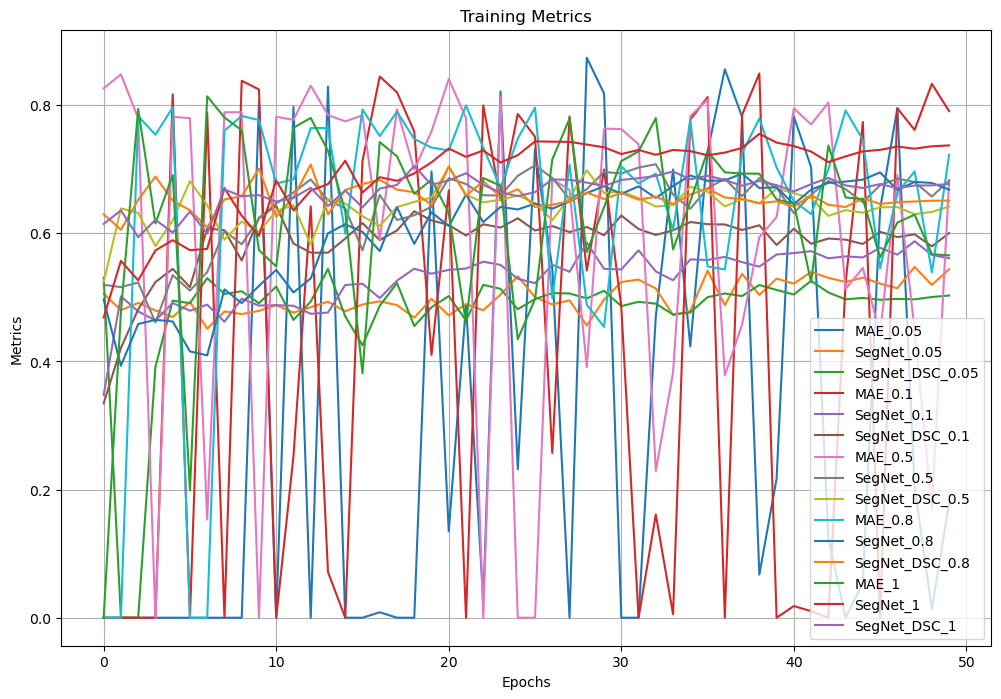

In [53]:
plot_all_training_metrics(mae_ious,seg_iou,seg_dsc_iou)

## Pixel Accuracy

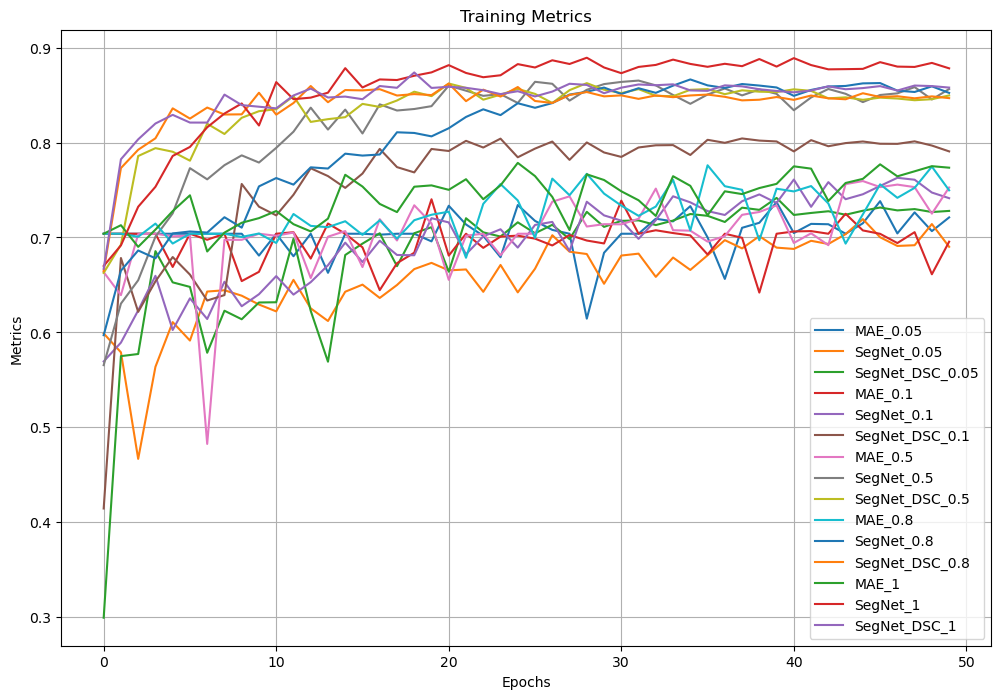

In [54]:
plot_all_training_metrics(mae_pix_acc,seg_pix_acc,seg_dsc_pix_acc)

# Training Loss

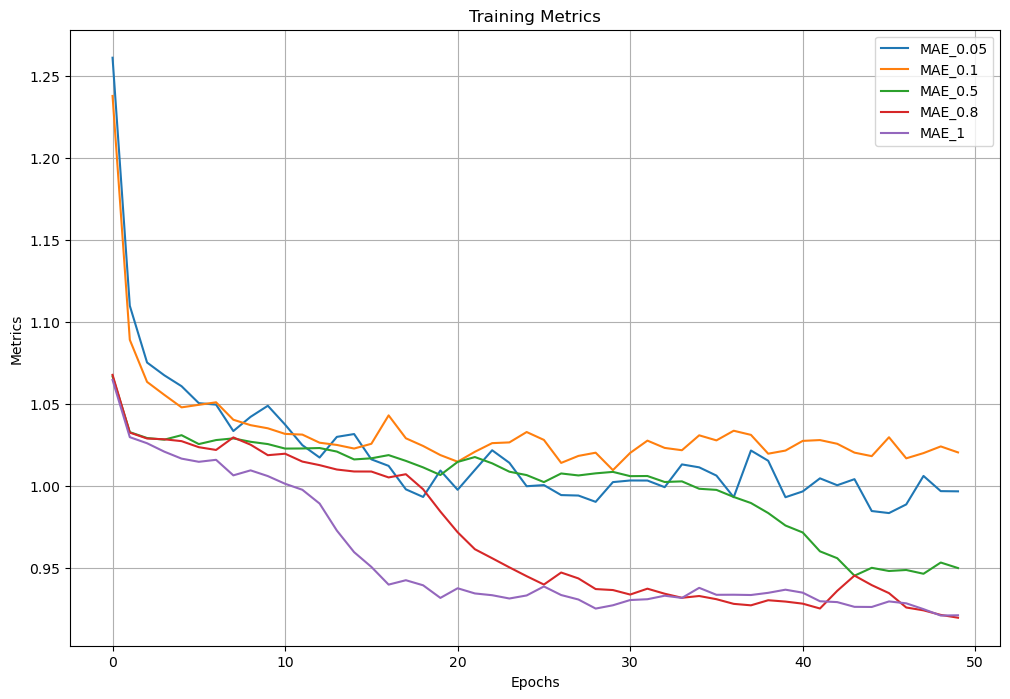

In [55]:
plot_mae_trainig_metrics(mae_train_loss)

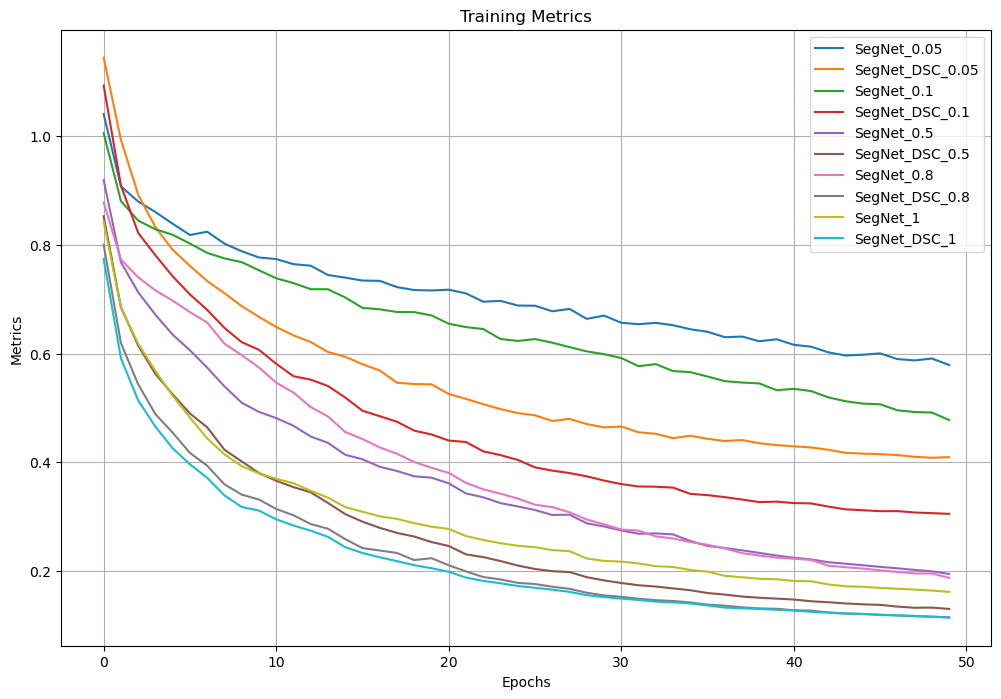

In [56]:
plot_seg_training_metrics(seg_train_loss,seg_dsc_train_loss)

# Validation Loss

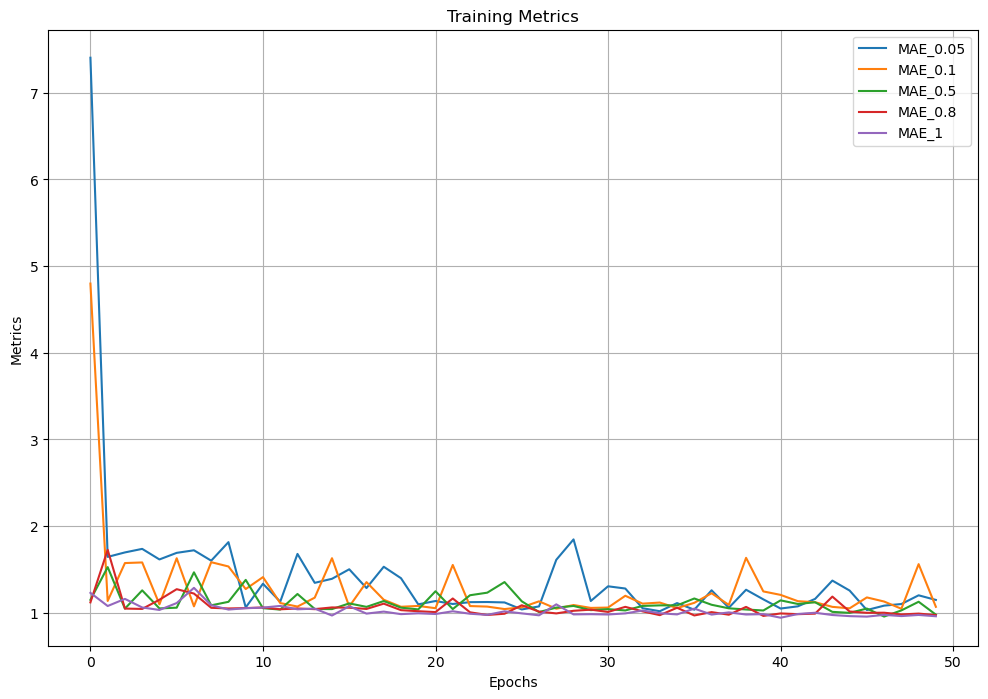

In [58]:
plot_mae_trainig_metrics(mae_val_loss)

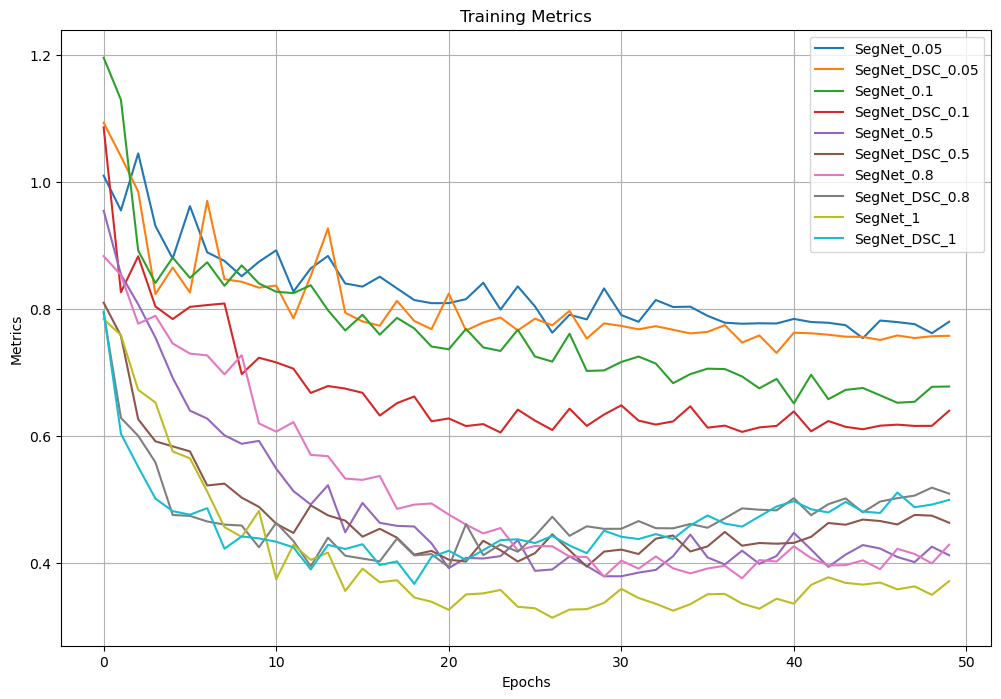

In [57]:
plot_seg_training_metrics(seg_val_loss,seg_dsc_val_loss)

# Training Dice (MAE only)

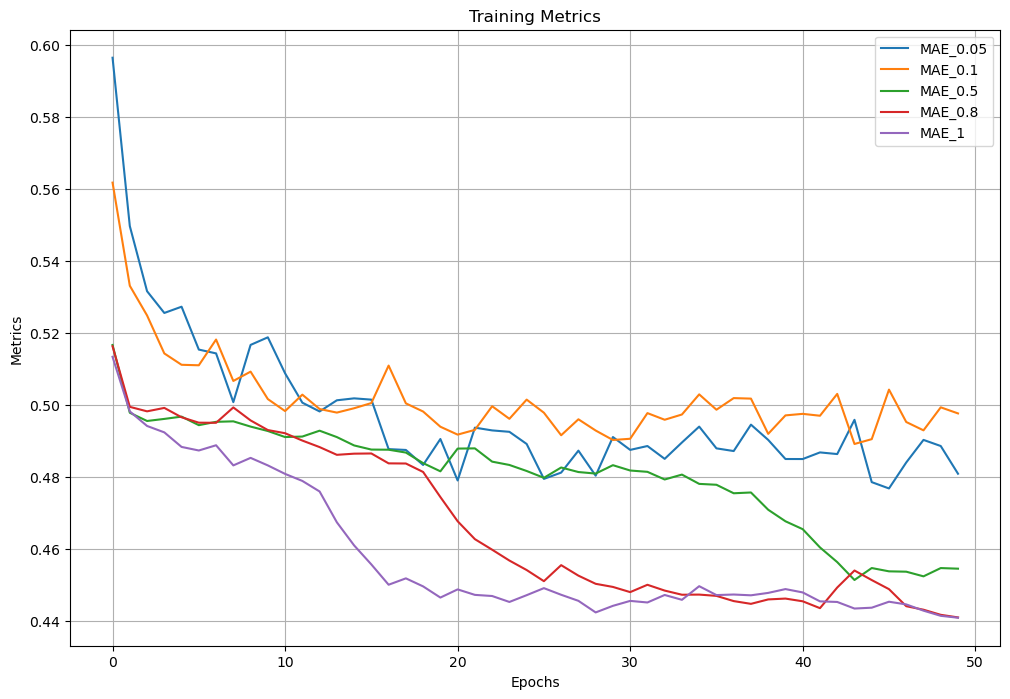

In [59]:
plot_mae_trainig_metrics(mae_train_dice)

# Validation Dice (MAE only)

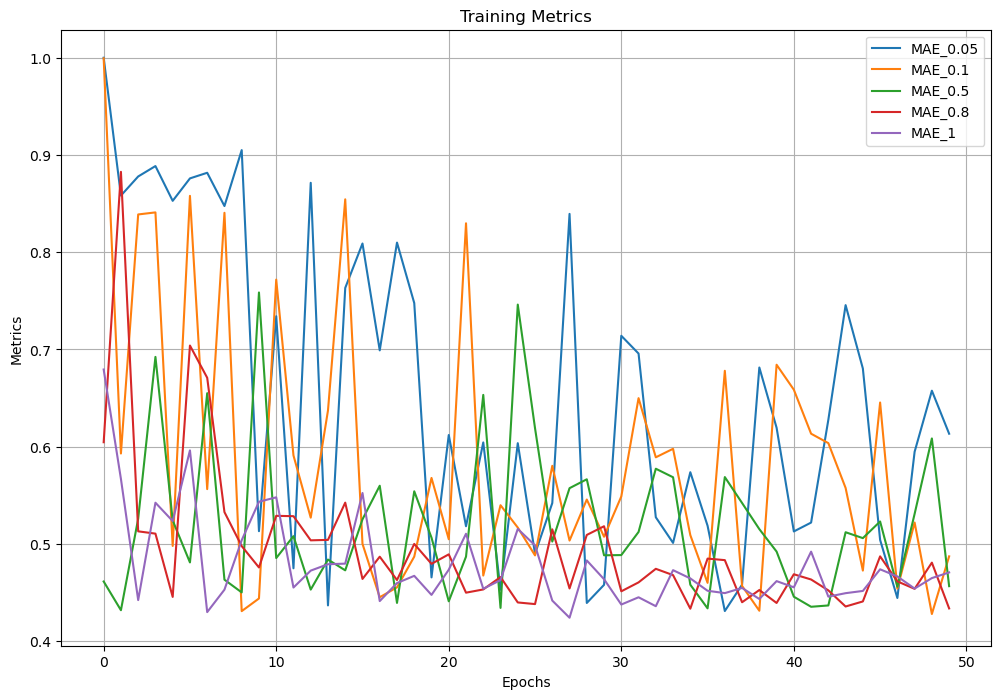

In [60]:
plot_mae_trainig_metrics(mae_val_dice)